<a href="https://colab.research.google.com/github/whatiddone/MLDL_Study/blob/main/1st_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1.k-최근접 이웃 회귀

## 농어 데이터 준비

In [ ]:
import numpy as np

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

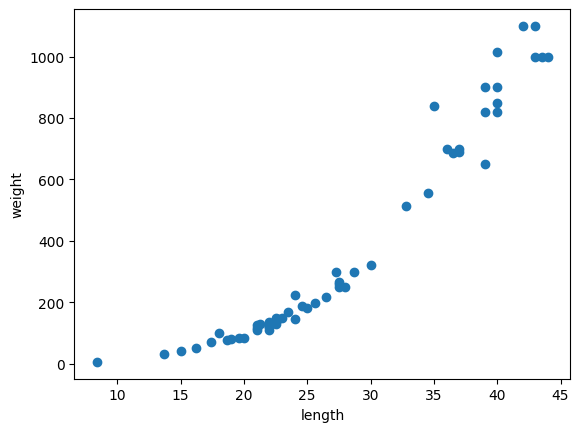

In [ ]:
# 산점도로 데이터 확인
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 머신러닝 준비

### 훈련 세트와 테스트 세트로 분류

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
#사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다.

print(train_input.shape, test_input.shape)

(42,) (14,)


test 데이터셋이 기본값인 14개(1/3)으로 설정되어 있다.

### 배열 변경

In [ ]:
# 현재 'train_input'과 'test_input'은 1차원 배열 형태이다. "reshape()" 메서드를 활용하여 원소의 배열을 변경해야 한다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


-1을 사용한 자동 계산법: 새로운 형태에서 하나의 차원에 -1을 지정하면, 해당 차원은 다른 차원의 값에 따라 자동으로 계산된다. <br>
이 경우 train은 (42,1), test는 (14,1)로 자동 계산된다.

In [ ]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## k-최근접 이웃 회귀 알고리즘(KNeighborsRegressor)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
# 테스트 세트의 R^2 점수
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)

print("테스트 세트에 대한 평균 절댓값 오차:", mae)

테스트 세트에 대한 평균 절댓값 오차: 19.157142857142862


결과에서 예측이 평균적으로 타깃값보다 19g 정도 다르다는 것을 확인

### 훈련세트를 사용해 평가해보기

In [ ]:
# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target))

0.9804899950518966


- train 데이터를 활용해 모델을 만들었으므로, 모델은 test보다 train에서 점수가 더 높은것이 일반적.

- train에서의 점수 > test에서의 점수: 과대적합
- train에서의 점수 < test에서의 점수 or 두 점수 모두 낮은 경우 : 과소적합

- 과대적합의 경우 모델을 덜 복잡하게 만들기(클러스터 수 높이기)
- 과소적합의 경우 모델을 더 복잡하게 만들기(클러스터 수 낮추기)

### 모델을 더 복잡하게 만들어 과소적합 해소하기

In [ ]:
# 이웃의 개수를 기본값인 5에서 3으로 변경
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

# 훈련 세트의 R^2 점수
print(knr.score(train_input, train_target))

# 테스트 세트의 R^2 점수
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


'훈련 세트의 점수 > 테스트 세트의 점수'이므로 과소적합 문제 해결.

*MAE: 평균 절댓값 오차 <br>
*MSE: 평균 제곱 오차